In [3]:
!pip install scikit-learn==0.23.1

  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolve

In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("data.csv")
df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [11]:
print(dir(df))

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul_

In [16]:
df.dropna()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [18]:
df.drop_duplicates()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


Missing values:
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64
Duplicate rows:
0


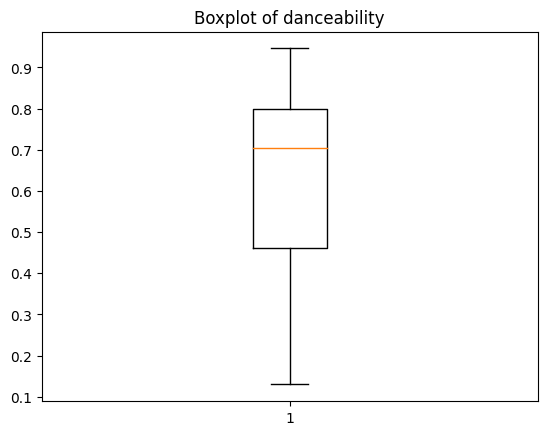

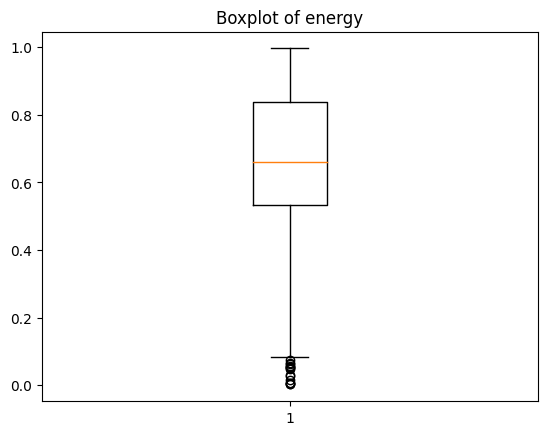

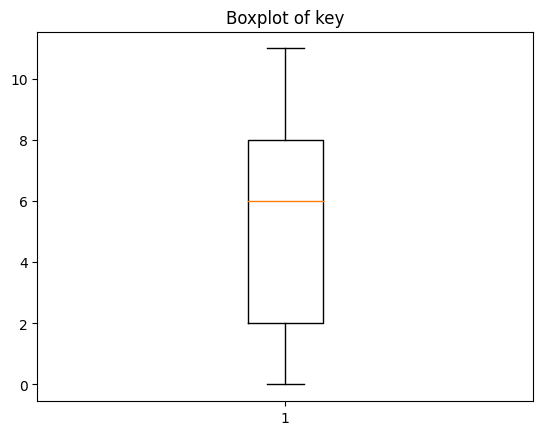

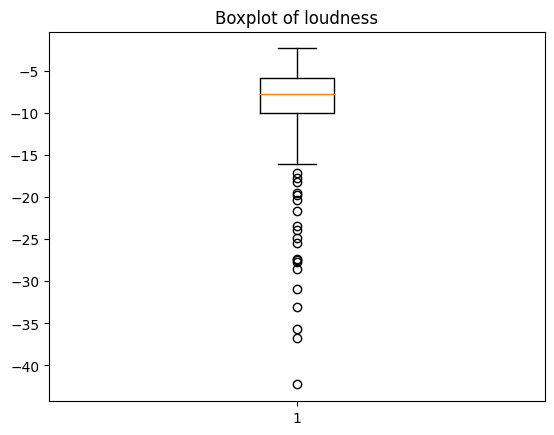

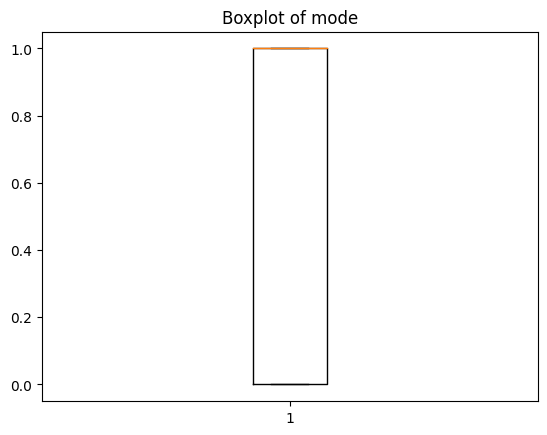

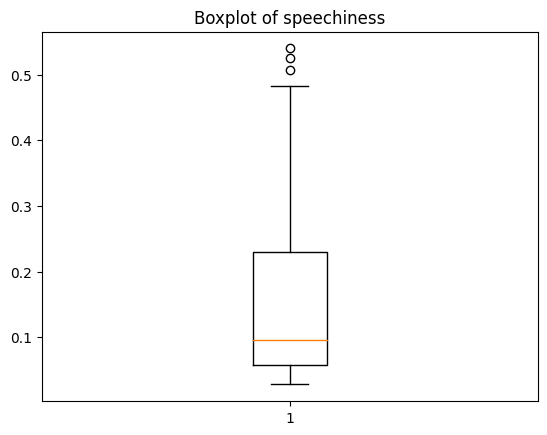

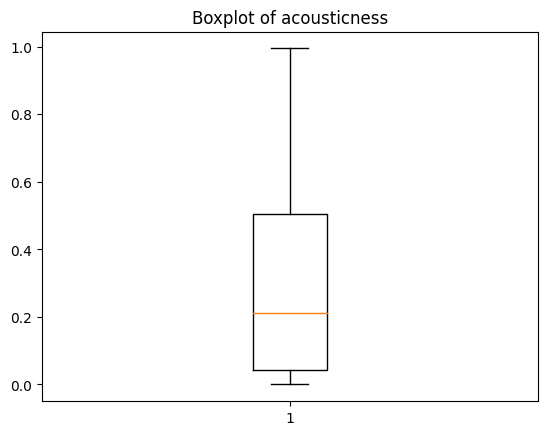

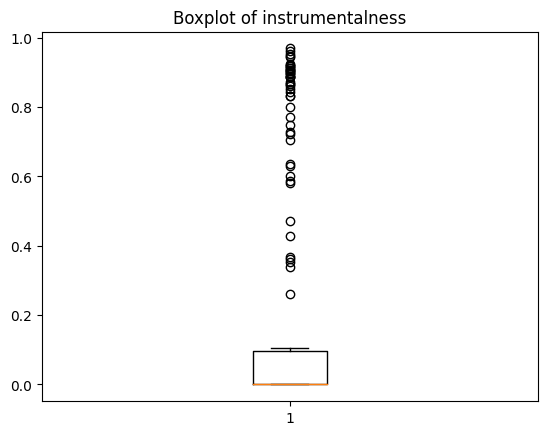

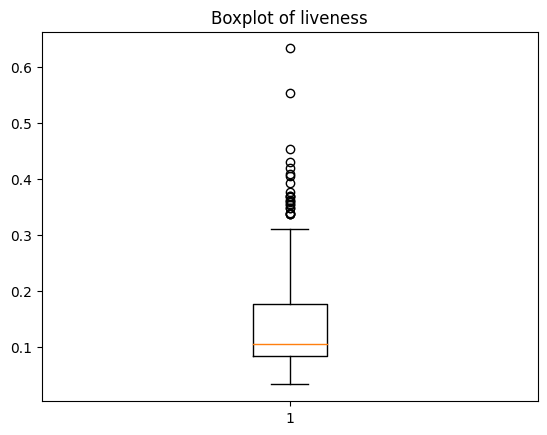

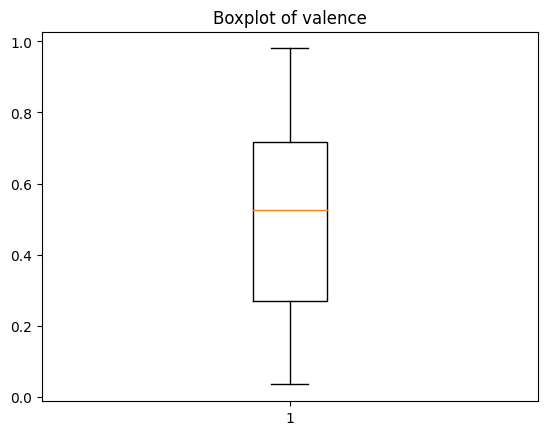

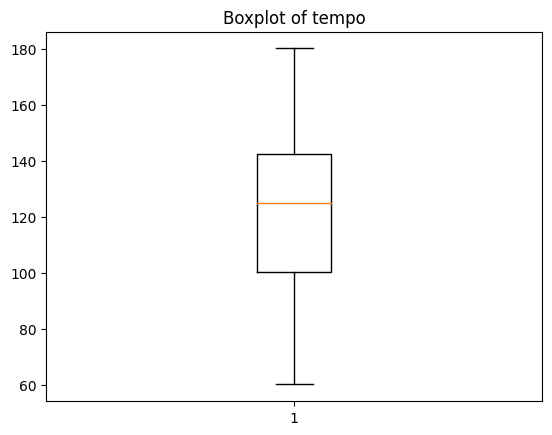

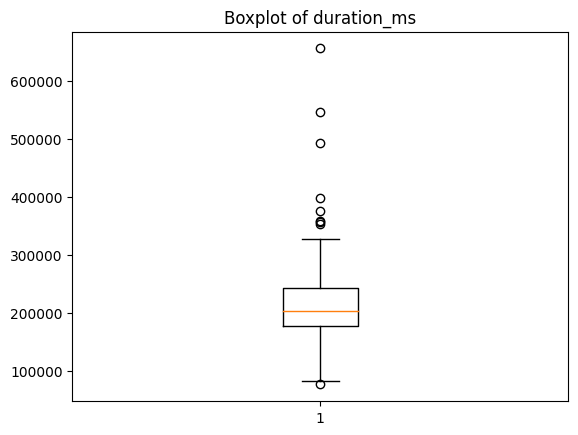

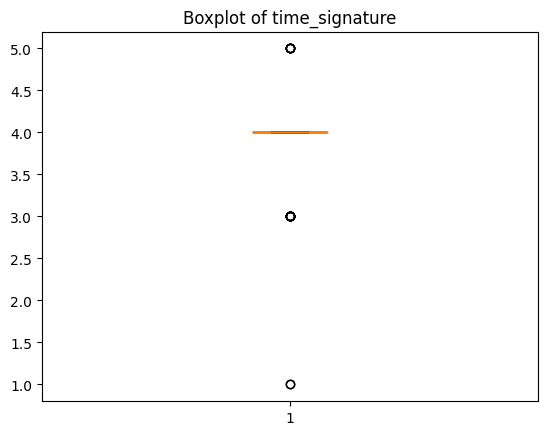

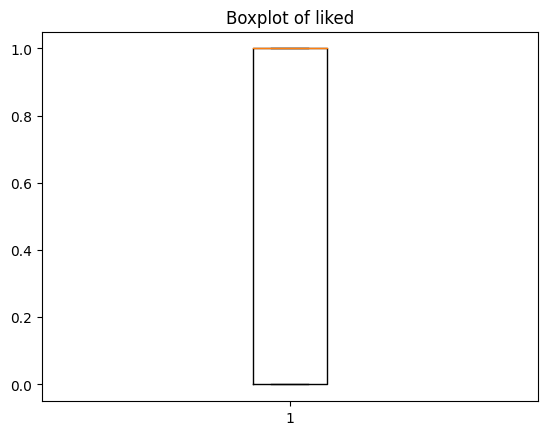

In [21]:


print("Missing values:")
print(df.isnull().sum())


print("Duplicate rows:")
print(df.duplicated().sum())


df = df.dropna()

df = df.drop_duplicates()

for column in df.columns:
  if df[column].dtype != 'object':
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

for column in df.columns:
  if df[column].dtype != 'object':
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [22]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.624,7,-6.764,0,0.0477,0.45100,0.000734,0.1000,0.628,95.968,304524,4,0
1,0.762,0.703,10,-7.951,0,0.3060,0.20600,0.000000,0.0912,0.519,151.329,247178,4,1
3,0.722,0.736,3,-6.994,0,0.0585,0.43100,0.000001,0.1230,0.582,89.860,208920,4,1
4,0.787,0.572,1,-7.516,1,0.2220,0.14500,0.000000,0.0753,0.647,155.117,179413,4,1
5,0.778,0.632,8,-6.415,1,0.1250,0.04040,0.000000,0.0912,0.827,140.951,224029,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.640,0.852,5,-6.810,0,0.0390,0.00418,0.000001,0.1460,0.861,145.009,190000,4,1
185,0.583,0.381,9,-10.033,0,0.0429,0.41600,0.000226,0.0958,0.153,127.667,316378,4,0
187,0.864,0.629,1,-6.602,0,0.2790,0.09870,0.000000,0.0737,0.220,140.025,190972,4,1
191,0.862,0.624,3,-11.630,1,0.0565,0.01920,0.000153,0.0465,0.882,124.896,254240,4,0


In [24]:
features = df[["danceability","energy","key","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms","time_signature"]]
X = np.asarray(features)
X[0:5]

array([[ 8.03000e-01,  6.24000e-01,  7.00000e+00, -6.76400e+00,
         4.77000e-02,  4.51000e-01,  7.34000e-04,  1.00000e-01,
         6.28000e-01,  9.59680e+01,  3.04524e+05,  4.00000e+00],
       [ 7.62000e-01,  7.03000e-01,  1.00000e+01, -7.95100e+00,
         3.06000e-01,  2.06000e-01,  0.00000e+00,  9.12000e-02,
         5.19000e-01,  1.51329e+02,  2.47178e+05,  4.00000e+00],
       [ 7.22000e-01,  7.36000e-01,  3.00000e+00, -6.99400e+00,
         5.85000e-02,  4.31000e-01,  1.18000e-06,  1.23000e-01,
         5.82000e-01,  8.98600e+01,  2.08920e+05,  4.00000e+00],
       [ 7.87000e-01,  5.72000e-01,  1.00000e+00, -7.51600e+00,
         2.22000e-01,  1.45000e-01,  0.00000e+00,  7.53000e-02,
         6.47000e-01,  1.55117e+02,  1.79413e+05,  4.00000e+00],
       [ 7.78000e-01,  6.32000e-01,  8.00000e+00, -6.41500e+00,
         1.25000e-01,  4.04000e-02,  0.00000e+00,  9.12000e-02,
         8.27000e-01,  1.40951e+02,  2.24029e+05,  4.00000e+00]])

In [25]:
y = np.asarray(df['liked'])
y [0:5]

array([0, 1, 1, 1, 1])

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (88, 12) (88,)
Test set: (22, 12) (22,)


In [27]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [28]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9043560606060606

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.88      1.00      0.94        15

    accuracy                           0.91        22
   macro avg       0.94      0.86      0.89        22
weighted avg       0.92      0.91      0.90        22

Confusion matrix, without normalization
[[15  0]
 [ 2  5]]


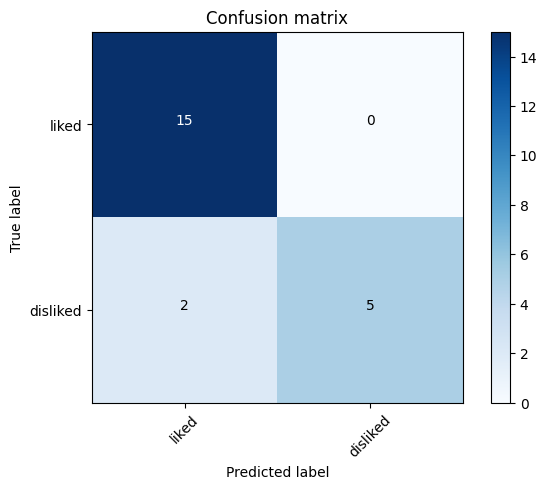

In [34]:


cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['liked','disliked'],normalize= False,  title='Confusion matrix')


In [35]:
pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 3.1 MB/s eta 0:00:00


In [40]:

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score


client_id = '70dd0df189844dcfbc1ac8b11518084c'
client_secret = 'd3dae35ae76c483ab59be3f3b270a4fc'
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
song_name = input("Enter the name of the song: ")
results = sp.search(q=song_name, type='track', limit=1)
track_id = results['tracks']['items'][0]['id']
audio_features = sp.audio_features(track_id)[0]
print(audio_features)
df = pd.DataFrame([audio_features])
X = df[["danceability","energy","key","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms","time_signature"]]
X = preprocessing.StandardScaler().fit_transform(X)
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X)
if y_pred == 1:
  print("You will like this song.")
else:
  print("You will not like this song.")


Enter the name of the song: 6 Foot 7 Foot
{'danceability': 0.364, 'energy': 0.752, 'key': 2, 'loudness': -5.429, 'mode': 1, 'speechiness': 0.304, 'acousticness': 0.0007, 'instrumentalness': 0, 'liveness': 0.318, 'valence': 0.606, 'tempo': 79.119, 'type': 'audio_features', 'id': '5Qy6a5KzM4XlRxsNcGYhgH', 'uri': 'spotify:track:5Qy6a5KzM4XlRxsNcGYhgH', 'track_href': 'https://api.spotify.com/v1/tracks/5Qy6a5KzM4XlRxsNcGYhgH', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5Qy6a5KzM4XlRxsNcGYhgH', 'duration_ms': 248587, 'time_signature': 4}
You will like this song.
